# diy-nn example usage with MNIST dataset

## Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from diynn.diy_nn import DIYNN
from diynn.utils import accuracy

RANDOM_STATE = 69

## MNIST dataset

### Get the dataset

In [2]:
digits = load_digits()
X = digits.data
y = digits.target

X.shape, y.shape

((1797, 64), (1797,))

### Examples

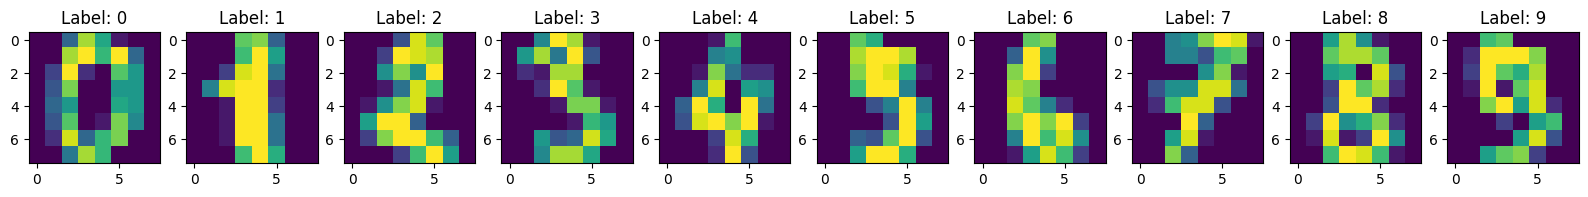

In [3]:
fig, ax = plt.subplots(1, 10)
fig.set_size_inches(20, 20)
for i in range(10):
    ax[i].imshow(digits.images[i])
    ax[i].set_title(f"Label: {i}")

### Shuffle the dataset

In [4]:
X, y = shuffle(X, y, random_state=RANDOM_STATE)

### Split the dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

### Transpose X

Our model takes as input a matrix $X$ of shape $n\times m$ where $n$ is the number of features and $m$ the number of observation ; our current $X$ matrix is of shape $m \times n$, we must transpose it.

In [6]:
X_train, X_test = X_train.T, X_test.T

In [7]:
X_train.shape, y_train.shape

((64, 1437), (1437,))

## DIY NN

In [8]:
INPUT_LAYER_SIZE = X_train.shape[0]
HIDDEN_LAYER_SIZE = 64 # this can be tunned
OUTPUT_LAYER_SIZE = len(np.unique(y_train))

nn = DIYNN(INPUT_LAYER_SIZE, HIDDEN_LAYER_SIZE, OUTPUT_LAYER_SIZE)

### Train the model

In [9]:
LEARNING_RATE = 0.1
N_EPOCH = 100

nn.train(X_train, y_train, learning_rate=LEARNING_RATE, n_iter=N_EPOCH, print_every=10)

Epoch:     0                             
Accuracy:  0.0501                        

Epoch:     10                            
Accuracy:  0.5247                        

Epoch:     20                            
Accuracy:  0.6750                        

Epoch:     30                            
Accuracy:  0.7411                        

Epoch:     40                            
Accuracy:  0.9088                        

Epoch:     50                            
Accuracy:  0.9283                        

Epoch:     60                            
Accuracy:  0.9534                        

Epoch:     70                            
Accuracy:  0.9617                        

Epoch:     80                            
Accuracy:  0.9638                        

Epoch:     90                            
Accuracy:  0.9701                        



### Test the model

In [10]:
preds = nn.predict(X_test)
accuracy(preds, y_test)

0.9222222222222223

We reach 92% of accuracy which is pretty good.